In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut path 
path = r"C:\Users\HP\Documents\06-2024 Instacart Basket Analysis" 

In [3]:
# import data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [8]:
ords_prods_all.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308


In [10]:
ords_prods_all.shape

(32404859, 32)

In [26]:
ords_prods_all.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'customer_frequency', 'frequency_flag', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

# 02. Creating a bar chart, histogram, scatterplot and line chart

I have already perfomed these visuals in the exercise.

# 03. "order_hour_of_day" histogram

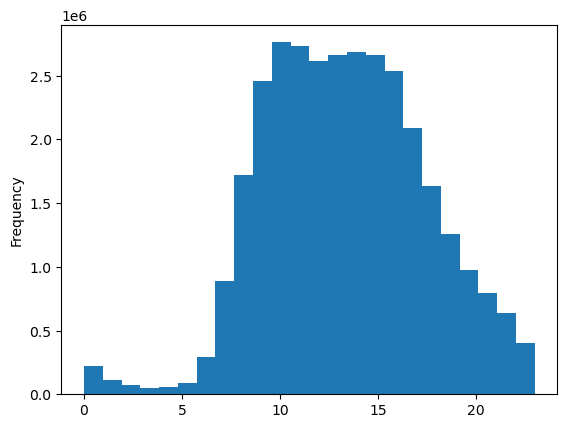

In [34]:
hist_hour = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

Most of the orders take place between 10 am to 3pm

# 04. "Loyalty Flag" Bar Chart

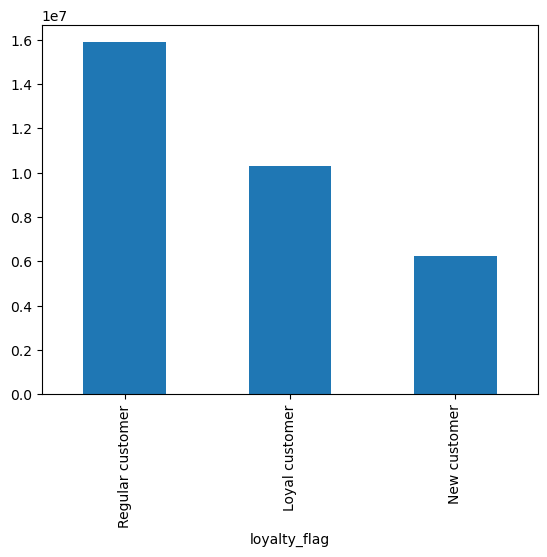

In [44]:
bar_loyalty = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [30]:
ords_prods_all['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

Most of the consumers fall into the 'Regular customer' field followed by 'Loyal', then 'New'

# 05. Line chart of "prices" vs "order_hour_of_day"

In [13]:
# creating list holding True/False values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [18]:
# Store 30% of the sample in the dataframe small
small = ords_prods_all[~dev]

In [21]:
len(ords_prods_all)

32404859

In [23]:
len(big) + len(small)

32404859

In [61]:
# isolating df to the columns that are needed
line_chart_df = small[['order_hour_of_day', 'prices']]

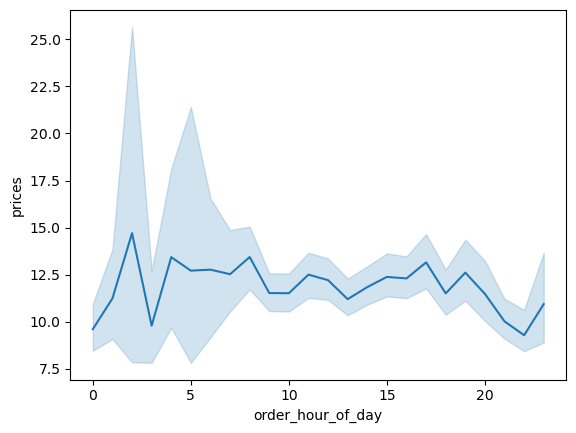

In [63]:
line = sns.lineplot(data = line_chart_df, x = 'order_hour_of_day', y = 'prices')

By looking at this chart, I am seeing that during daytime, the prices are fairly consistent at $12 dollars. During the nighttime hours, there is a decrease, but then increases around 2 am (drunchies?) followed by a dramatic decrease at 3am.

# 06. Line chart of "age" and "n_dependants"

In [67]:
# isolating df to the columns that are needed
line_chart_2 = small[['age', 'n_dependants']]

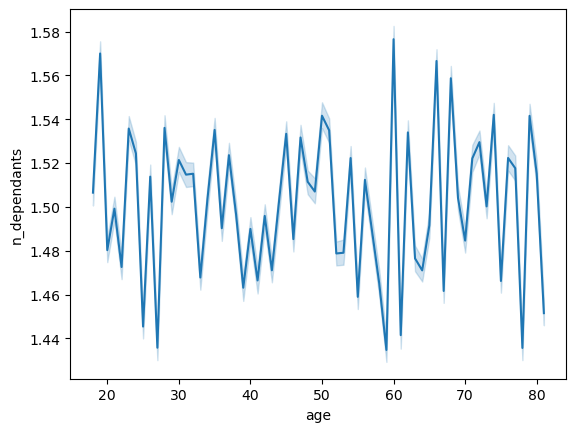

In [71]:
line_2 = sns.lineplot(data = line_chart_2, x = 'age', y = 'n_dependants')

There is no correlation between age and the number of dependants in a household.

# 07. Scatterplot of "age" and "income"

In [75]:
# isolating df to the columns that are needed
scatterplot_df = small[['age', 'income']]

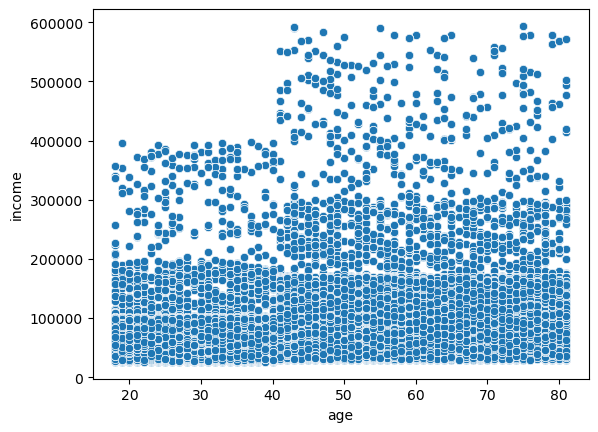

In [77]:
scatterplot = sns.scatterplot(data = scatterplot_df, x = 'age', y = 'income')

Based on the scatterplot above, as one gets older so does their income. Between ages 18 and ~39, the income is lower. Beginning at the age of 40, there is an increase in ones income. This can be helpful for targeted marketing where ads containing higher price points can be pushed to users 40 and above. Conversely, ads containing lower price points can be pushed to users less than 40 years of age.

# 08. Exporting visualizations

In [82]:
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_HOD.png'))
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_v_hour.png'))
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_v_depen.png'))
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sp_age_v_income.png'))